# CFRM 521 Spring 2020 

## Final Report

<br>**Title**   Fraudulent Credit Card Transaction Detection Through Machine Learning
<br>**Course**   CFRM 521 Machine Learning for Finance
<br>**Authors**   Jiayu Liu, jiayuliu@uw.edu, Shuyu Yan, shuyuy2@uw.edu, Weining Xu, xwnx10@uw.edu, Yuan Yang, yang1201@uw.edu

## Abstract

Fraud losses incurred by banks and merchants on all credit, debit, and prepaid general purpose and private label payment cards issued globally amounted to £16.74 billion ($21.84 billion) in 2015 according to Bloomberg report. Analyzing instant credit card transaction data to detect fraudulent cases can be an arduous process due to the number of parameters and the huge volume of the dataset. However, machine learning can be an ideal method to combat fraudulent financial transactions. By training the past transaction data into learning models, we can apply the models on vast data sets to automate the process of detecting unusual activities, like anomalies, and flagging them instantly. 
The goal of our project is to train different machine learning classification models on the credit card transaction dataset we have to accurately classify the sample into fraudulent and genuine categories and more focus on reducing the false-negative rate and to maximize the recall rate.

This project consists 5 major parts:

1. Background & introduction
1. Data set introduction
1. Research process
1. Result discussion
1. Limitation & improvement

We will talk about our project background and relevant peer research in the first part and move on introducing our dataset structure. We will go into details to talk about our machine learning model performance in the 3rd part and further compare the model performance with each other in the discussion section. And finally, we conclude our project with summary of our model limitations and future improvement.

## 1. Background & Introduction

Many previous research has put great emphasis on building a system to avoid false positive transactions (positive as fraud and negative as genuine). Usually, this kind of transactions are genuine transactions which are wrongly classified as frauds and get delcined by the banks. An article on JAVELIN, _False-Positive Card Declines Push Consumers to Abandon Issuers and Merchants_ , talks about the effect of false-positive decline can seriously jeopardize customers' loyalty and lead the customers to abandon the issuers and merchants. Standing from service and business points, false positive rate (false discovery rate or 1 - precision) is a great concern; however, this metric doesn't help us to efficiently detect anomalies or fraudulent transactions.If we work very hard to reduce false positive transactions, we may create a model that can easily let many frauds pass by. 

Thus, in stead of focusing on reducing false decline transactions, our research takes on a more practical standpoint by emphasizing on reducing false negative rate; in other words, to build a model good at detecting frauds and to increase recall rate (accurately identify frauds among all the frauds). False negatives are the events when merchants or financial institutions wrongly classify fraudulent transactions as genuine transactions. We believe the cost of such cases can be much higher than the false positive cases. Because in the former scenario, a series of procedures might be triggered to retrieve the loss money back and the underlying budget and labor could be huge comparing to false positive scenarios, in which the worst case is transaction declined. Because there is always a famous trade-off between recall and precision, standing in an utilitarian perspective of limiting the financial impact brought by fraudulent transactions, our research will put more emphasis on building machine learning models achieving high recall rates.

## 2. Data Set Introduction and Preparation

The data we used to train our models come from Kaggle, Credit Card Fraud Detection. The dataset contains credit card transactions made in random two days of September 2013 in Europe. The dataset consists of 284,807 rows of transaction data, in which 492 are frauds and labeled as '1' in the Class column; genuine transactions on the opposite are labeled as '0'. One problem related to this dataset is that the dataset we used is highly unbalanced and positive frauds only account for 0.172% of all transactions.

Moreover, due to confidentiality issues, the dataset contains only numerical input variables which are the result of PCA transformation. The original features and more background information are not included in our dataset. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'.

* **Time**: seconds elapsed since the first transaction was made in the dataset
* **Amount**: transaction amount in Euro
* **Class**: the response variable; 1 in case of fraud and 0 otherwise

In [3]:
import pandas as pd
import numpy as np
df = pd.read_csv('creditcard.csv')  
print(df.head(),df.shape)

//anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

Before we splitted the dataset for model training, we realized that the _time_ column is a linearly time accumulating variable, which might not be relevant to the transaction itself. We designed a function to help us drop the first _time_ column if we want. During the later training process, we realized that retaining the _time_ column in our X variables can actually boost our recall rate somehow; thus, for the later parts, we decided to keep _time_ column in our dataset. 

In [5]:
##Retain the Time cloumn or not
drop = False

def drop_time(df,drop):
    
    if drop == True:
        data = df.drop(['Time'], axis=1).copy()
    else:
        data = df.copy()
        
    return data

data = drop_time(df,drop)

#### _Splitting Dataset_

In [6]:
##Split X and y variables
X, y = data.iloc[:,0:-1],data.iloc[:,-1]

## Scaling the X variable
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

print("X.shape:{},Y.shape:{}".format(X.shape,y.shape))

X.shape:(284807, 30),Y.shape:(284807,)


In our project, we decided to split the dataset into 3 groups: **training set**, **validation set**, and **testing set**. 
* To keep the number of frauds balanced in each group, we have conducted stratified sampling when splitting the dataset. Each dataset contains 80%, 5%,and 15% of data in original dataset. 
* In some models, we might use validation dataset to tune our training models to obtain optimal hyperparameters.
* After we got a good combination of hyperparameters for our models, we trained the model on the training dataset and evaluated its performance on testing dataset.  

The code below can offer you an overview of the size and the number of frauds in each dataset.

In [4]:
## Train, tuning, validation, testing sets split
from sklearn.model_selection import train_test_split

## Splitting train set
X_train, X_temp, y_train, y_temp = train_test_split(X, y, train_size=0.80,stratify=y,random_state = 42)

## Splitting testing set
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, train_size=0.75,stratify=y_temp,random_state = 42)

print('Dataset overview')
print("Training size :{}, training fraud sample size :{}". format(X_train.shape[0],sum(y_train))) 
print("Testing size :{}, testing fraud sample size :{}". format(X_test.shape[0],sum(y_test))) 
print("Validation size :{}, Validation fraud sample size :{}". format(X_val.shape[0],sum(y_val))) 
print("_________________________________________________________________________________________")

Dataset overview
Training size :227845, training fraud sample size :394
Testing size :42721, testing fraud sample size :73
Validation size :14241, Validation fraud sample size :25
_________________________________________________________________________________________


## 3. Research Process

### 3.1 Methods 

We adopted three categories of machine learning models to classify our dataset. Each category has more specifically trained models to achieve higher recall. The types of models we used are listed below:

* Supervised machine learning
> * Logistic Classification and Stochastic Gradient Descent Classification (Weining Xu)
> * Tree Classification and Linear Support Vector Machine (Shuyu Yan)
* Unsupervised machine learning (Jiayu Liu)
* Deep Neural Network (Yuan Yang)



### 3.2 Algorithm & Results

#### 3.2.1 Supervised Machine Learning - Logistic Classfication and Stochastic Gradient Descent Classification

#### _Training_

We want to detect "Class" = 1, which is fraud.

In [5]:
y_train_1 = (y_train == 1)
y_val_1 = (y_val == 1)
y_test_1 = (y_test == 1)

We will apply Logistic Regression Classifier, and use Stochastic Gradient Descent Classifier as a comparison. We fit the model using train data set, then use valid data set to find the best model using grid search by tuning hyperparameters.

* Logistic Classfication

In [6]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
log_org = LogisticRegression(random_state=42, max_iter=10000)
log_reg = log_org.fit(X_train, y_train)

In [7]:
import matplotlib.pyplot as plt
from sklearn.metrics import recall_score
from sklearn.metrics import log_loss
#from sklearn.model_selection import train_test_split
def plot_learning_curves(model, X_train, X_val, y_train, y_val):
    #X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_recalls, val_recalls = [], []
    train_loss, val_loss = [], []
    for m in np.arange(1000, len(X_train), 5000):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_recalls.append(recall_score(y_train[:m], y_train_predict))
        val_recalls.append(recall_score(y_val, y_val_predict))
        train_loss.append(log_loss(y_train[:m], y_train_predict))
        val_loss.append(log_loss(y_val, y_val_predict))


    ln3 = plt.plot((train_recalls), "-+",color='orange', linewidth=2, label="Recall_train")
    ln4 = plt.plot((val_recalls), "r-",linewidth=2, label="Recall_val")
    #plt.legend(loc="best", fontsize=14)   
    plt.xlabel("Training set size", fontsize=14) 
    plt.ylabel("Recall", fontsize=14) 
    plt.ylabel("Recall", color='b')
    plt.tick_params('y', colors='b')
    #plt.gca().set_xlim(0, None)
    #plt.gca().set_ylim(0, 1)
    plt.grid(True)
    
    ax2 = plt.gca().twinx()
    ln1 = plt.plot((train_loss), "g-+", linewidth=2, label="Loss_train")
    ln2 = plt.plot((val_loss), "b-", linewidth=2, label="Loss_val")
    ax2.set_ylabel("Loss", fontsize=14, color = 'purple')
    ax2.tick_params('y', colors='purple')
    ax2.set_ylim(0, 0.1)

    lns = ln1+ln2+ln3+ln4
    labs = [l.get_label() for l in lns]
    plt.legend(lns, labs, loc=(1.2,0), fontsize=16)

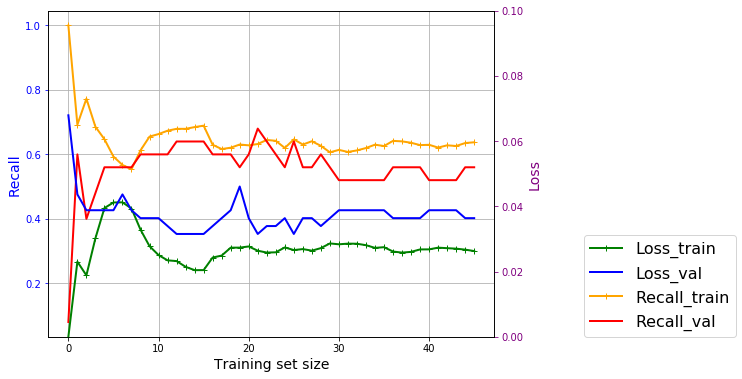

In [8]:
plt.figure(figsize=(8, 6))
plot_learning_curves(log_reg, X_train, X_val, y_train, y_val)  
plt.show()  

We can see that there is no significant gap between RMSE of two data sets, and both in-sample and out-of-sample performance do not "reach a plateau", therefore, we can conclude that the model is a good fit. 

However, we still regulaize hyperparameter to find the better model as followed.

In [44]:
# Create regularization hyperparameter space
C = [0.1, 1, 50, 100]
solver = ['lbfgs', 'saga']
# Create hyperparameter options
param_grid = dict(C=C, solver = solver)

grid_log = GridSearchCV(log_reg, param_grid, cv=5, verbose=1000, n_jobs = -1, scoring = 'recall')
grid_log

GridSearchCV(cv=5,
             estimator=LogisticRegression(max_iter=10000, random_state=42),
             n_jobs=-1,
             param_grid={'C': [0.1, 1, 50, 100], 'solver': ['lbfgs', 'saga']},
             scoring='recall', verbose=1000)

In [45]:
logit = grid_log.fit(X_val, y_val_1)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
Memmapping (shape=(14241, 30), dtype=float64) to new file /var/folders/q9/5v06sytn35b9n240z2gn5w6r0000gn/T/joblib_memmapping_folder_37946_6967990403/37946-140586219550288-4d2aa81429d84a668c4e648cf3d1d8ec.pkl
Pickling array (shape=(14241,), dtype=int64).
Pickling array (shape=(14241,), dtype=bool).
Pickling array (shape=(14241,), dtype=int64).
Pickling array (shape=(11392,), dtype=int64).
Pickling array (shape=(2849,), dtype=int64).
Memmapping (shape=(14241, 30), dtype=float64) to old file /var/folders/q9/5v06sytn35b9n240z2gn5w6r0000gn/T/joblib_memmapping_folder_37946_6967990403/37946-140586219550288-4d2aa81429d84a668c4e648cf3d1d8ec.pkl
Pickling array (shape=(14241,), dtype=int64).
Pickling array (shape=(14241,), dtype=bool).
Pickling array (shape=(14241,), dtype=int64).
Pickling array (shape=(11393,), dtype=int64).
Pickling array (shape=(2848,), dtype=

[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:   22.3s
Memmapping (shape=(14241, 30), dtype=float64) to old file /var/folders/q9/5v06sytn35b9n240z2gn5w6r0000gn/T/joblib_memmapping_folder_37946_6967990403/37946-140586219550288-4d2aa81429d84a668c4e648cf3d1d8ec.pkl
Pickling array (shape=(14241,), dtype=int64).
Pickling array (shape=(14241,), dtype=bool).
Pickling array (shape=(14241,), dtype=int64).
Pickling array (shape=(11393,), dtype=int64).
Pickling array (shape=(2848,), dtype=int64).
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   23.0s
Memmapping (shape=(14241, 30), dtype=float64) to old file /var/folders/q9/5v06sytn35b9n240z2gn5w6r0000gn/T/joblib_memmapping_folder_37946_6967990403/37946-140586219550288-4d2aa81429d84a668c4e648cf3d1d8ec.pkl
Pickling array (shape=(14241,), dtype=int64).
Pickling array (shape=(14241,), dtype=bool).
Pickling array (shape=(14241,), dtype=int64).
Pickling array (shape=(11393,), dtype=int64).
Pickling array (shape=(2848,), dtype=int64).
[Par

[Parallel(n_jobs=-1)]: Done  30 tasks      | elapsed:  1.6min
Memmapping (shape=(14241, 30), dtype=float64) to old file /var/folders/q9/5v06sytn35b9n240z2gn5w6r0000gn/T/joblib_memmapping_folder_37946_6967990403/37946-140586219550288-4d2aa81429d84a668c4e648cf3d1d8ec.pkl
Pickling array (shape=(14241,), dtype=int64).
Pickling array (shape=(14241,), dtype=bool).
Pickling array (shape=(14241,), dtype=int64).
Pickling array (shape=(11393,), dtype=int64).
Pickling array (shape=(2848,), dtype=int64).
[Parallel(n_jobs=-1)]: Done  31 tasks      | elapsed:  1.6min
Memmapping (shape=(14241, 30), dtype=float64) to old file /var/folders/q9/5v06sytn35b9n240z2gn5w6r0000gn/T/joblib_memmapping_folder_37946_6967990403/37946-140586219550288-4d2aa81429d84a668c4e648cf3d1d8ec.pkl
Pickling array (shape=(14241,), dtype=int64).
Pickling array (shape=(14241,), dtype=bool).
Pickling array (shape=(14241,), dtype=int64).
Pickling array (shape=(11392,), dtype=int64).
Pickling array (shape=(2849,), dtype=int64).
[Par

In [46]:
logit.best_params_

{'C': 1, 'solver': 'lbfgs'}

In [47]:
logit_best = logit.best_estimator_
logit_best

LogisticRegression(C=1, max_iter=10000, random_state=42)

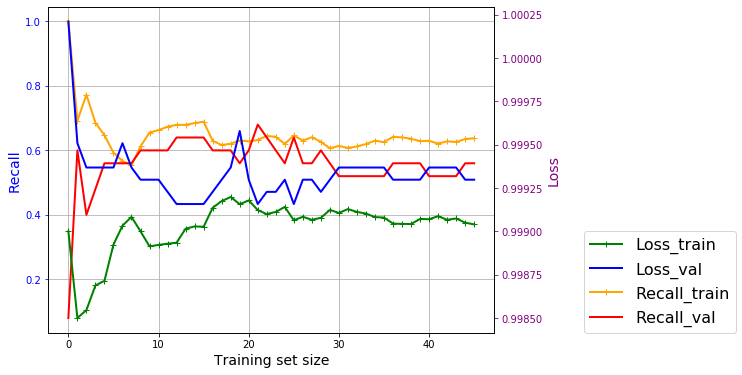

In [48]:
plt.figure(figsize=(8, 6))
plot_learning_curves(logit_best, X_train, X_val, y_train, y_val)                     
plt.show()  

We can observe that the curve did not change too much, which is a good fit. 

* Stochastic Gradient Descent Classification (SGD)

In [14]:
from sklearn.linear_model import SGDClassifier
sgd_org = SGDClassifier(loss = 'hinge', max_iter=10000, tol=1e-3, random_state=42)
sgd_clf = sgd_org.fit(X_train, y_train)

In [15]:
import matplotlib.pyplot as plt
from sklearn.metrics import recall_score
from sklearn.metrics import hinge_loss
#from sklearn.model_selection import train_test_split
def plot_learning_curves(model, X_train, X_val, y_train, y_val):
    #X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_recalls, val_recalls = [], []
    train_loss, val_loss = [], []
    for m in np.arange(1000, len(X_train), 5000):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_recalls.append(recall_score(y_train[:m], y_train_predict))
        val_recalls.append(recall_score(y_val, y_val_predict))
        train_loss.append(hinge_loss(y_train[:m], y_train_predict))
        val_loss.append(hinge_loss(y_val, y_val_predict))


    ln3 = plt.plot((train_recalls), "-+",color='orange', linewidth=2, label="Recall_train")
    ln4 = plt.plot((val_recalls), "r-",linewidth=2, label="Recall_val")
    #plt.legend(loc="best", fontsize=14)   
    plt.xlabel("Training set size", fontsize=14) 
    plt.ylabel("Recall", fontsize=14) 
    plt.ylabel("Recall", color='b')
    plt.tick_params('y', colors='b')
    #plt.gca().set_xlim(0, None)
    #plt.gca().set_ylim(0, 1)
    plt.grid(True)
    
    ax2 = plt.gca().twinx()
    ln1 = plt.plot((train_loss), "g-+", linewidth=2, label="Loss_train")
    ln2 = plt.plot((val_loss), "b-", linewidth=2, label="Loss_val")
    ax2.set_ylabel("Loss", fontsize=14, color = 'purple')
    ax2.tick_params('y', colors='purple')
    #ax2.set_ylim(0.995, 1)

    lns = ln1+ln2+ln3+ln4
    labs = [l.get_label() for l in lns]
    plt.legend(lns, labs, loc=(1.2,0), fontsize=16)

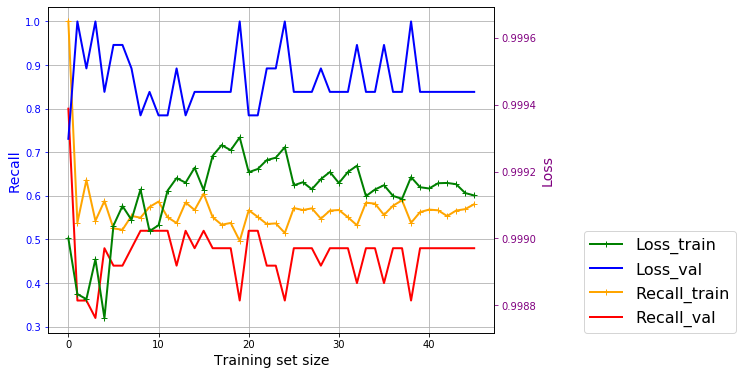

In [16]:
plt.figure(figsize=(8, 6))
plot_learning_curves(sgd_clf, X_train, X_val, y_train, y_val)  
plt.show() 

We can see that the model is overfitting through the loss curve. 

In [17]:
alpha = [0.0001, 0.001, 0.01, 0.1]
#n_iter = [50, 100, 500, 800]
penalty = ["none", "l1", "l2"]
#lr = ['optimal', 'constant', 'invscaling']
param_sgd = dict(alpha=alpha, penalty=penalty)

grid_sgd = GridSearchCV(sgd_clf, param_sgd, cv=5, verbose=1000, n_jobs = -1, scoring = 'recall')

In [18]:
sgd = grid_sgd.fit(X_val, y_val_1)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
Memmapping (shape=(14241, 30), dtype=float64) to new file /var/folders/q9/5v06sytn35b9n240z2gn5w6r0000gn/T/joblib_memmapping_folder_37946_6967990403/37946-140586219550288-4d2aa81429d84a668c4e648cf3d1d8ec.pkl
Pickling array (shape=(14241,), dtype=int64).
Pickling array (shape=(14241,), dtype=bool).
Pickling array (shape=(14241,), dtype=int64).
Pickling array (shape=(11392,), dtype=int64).
Pickling array (shape=(2849,), dtype=int64).
Memmapping (shape=(14241, 30), dtype=float64) to old file /var/folders/q9/5v06sytn35b9n240z2gn5w6r0000gn/T/joblib_memmapping_folder_37946_6967990403/37946-140586219550288-4d2aa81429d84a668c4e648cf3d1d8ec.pkl
Pickling array (shape=(14241,), dtype=int64).
Pickling array (shape=(14241,), dtype=bool).
Pickling array (shape=(14241,), dtype=int64).
Pickling array (shape=(11393,), dtype=int64).
Pickling array (shape=(2848,), dtype

Pickling array (shape=(14241,), dtype=bool).
Pickling array (shape=(14241,), dtype=int64).
Pickling array (shape=(11392,), dtype=int64).
Pickling array (shape=(2849,), dtype=int64).
Pickling array (shape=(11393,), dtype=int64).
Pickling array (shape=(2848,), dtype=int64).
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.7s
Memmapping (shape=(14241, 30), dtype=float64) to old file /var/folders/q9/5v06sytn35b9n240z2gn5w6r0000gn/T/joblib_memmapping_folder_37946_6967990403/37946-140586219550288-4d2aa81429d84a668c4e648cf3d1d8ec.pkl
Pickling array (shape=(14241,), dtype=int64).
Pickling array (shape=(14241,), dtype=bool).
Pickling array (shape=(14241,), dtype=int64).
Pickling array (shape=(11393,), dtype=int64).
Pickling array (shape=(2848,), dtype=int64).
Pickling array (shape=(11393,), dtype=int64).
Pickling array (shape=(2848,), dtype=int64).
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.8s
Memmapping (shape=(14241, 30), dtype=float64) to old file /var/folders/q9/5v

[Parallel(n_jobs=-1)]: Done  54 out of  60 | elapsed:    1.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  56 out of  60 | elapsed:    1.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  58 out of  60 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.1s finished


In [19]:
sgd.best_params_

{'alpha': 0.0001, 'penalty': 'l1'}

In [20]:
sgd_best = sgd.best_estimator_
sgd_best

SGDClassifier(max_iter=10000, penalty='l1', random_state=42)

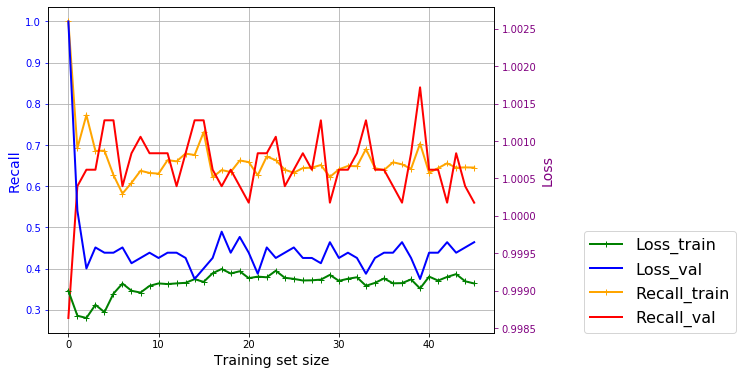

In [21]:
plt.figure(figsize=(8, 6))
plot_learning_curves(sgd_best, X_train, X_val, y_train, y_val)  
plt.show() 

We can see on the graph that the overfitting problem was fixed some through regularizing by lasso regression ($\ell$1).

#### _Evaluation_

In [49]:
from sklearn.metrics import precision_score, recall_score

grid_pred_log = logit_best.predict(X_test)
grid_pred_sgd = sgd_best.predict(X_test)

In [50]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test_1, grid_pred_log, labels=[False,True])

array([[42639,     9],
       [   24,    49]])

Through Logistic Regression after Grid Search:
* There are 42639 "ture negatives" ("not fraud" cases correctly classified as "not fraud")
* There are 49 "ture positives" ("fraud" cases correctly classified as "fraud")
* There are 9 "false positives" ("not fraud" cases incorrectly classified as "fraud"
* There are 24 "false negatives" ("fraud" cases incorrectly classified as "not fraud")

The proportion of false positives in this data set is acceptable. 

In [52]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test_1, grid_pred_sgd, labels=[False,True])

array([[42633,    15],
       [   23,    50]])

Through SGD Classifier after Grid Search:
* There are 42633 "ture negatives" ("not fraud" cases correctly classified as "not fraud")
* There are 50 "ture positives" ("fraud" cases correctly classified as "fraud")
* There are 15 "false positives" ("not fraud" cases incorrectly classified as "fraud"
* There are 23 "false negatives" ("fraud" cases incorrectly classified as "not fraud")

The number of false positives increases, and is relatively high with respect to true positives. 

In [53]:
print("The precision score of Logistic Regression is", precision_score(y_test, grid_pred_log))
print("The precision score of SGD Classifier is", precision_score(y_test, grid_pred_sgd))

The precision score of Logistic Regression is 0.8448275862068966
The precision score of SGD Classifier is 0.7692307692307693


In [54]:
print("The recall score of Logistic Regression is", recall_score(y_test, grid_pred_log))
print("The recall score of SGD Classifier is", recall_score(y_test, grid_pred_sgd))

The recall score of Logistic Regression is 0.6712328767123288
The recall score of SGD Classifier is 0.684931506849315


The precision score is not really high, however, the low recall score is more important in this senario. We want to know what percetage of the fraud which we really detect to **prevent money loss**.

The recall scores of both models through grid search are not ideally high. So we try to use orginal classifiers without doing grid search.

In [55]:
log = LogisticRegression(random_state=42)
sgd = sgd_org = SGDClassifier(random_state=42)

In [56]:
log = log.fit(X_train, y_train)
sgd = sgd.fit(X_train, y_train)

In [57]:
log_pred = log.predict(X_test)
sgd_pred = sgd.predict(X_test)

In [58]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test_1, log_pred, labels=[False,True])

array([[42639,     9],
       [   24,    49]])

Through Logistic Regression:
* There are 42639 "ture negatives" ("not fraud" cases correctly classified as "not fraud")
* There are 49 "ture positives" ("fraud" cases correctly classified as "fraud")
* There are 9 "false positives" ("not fraud" cases incorrectly classified as "fraud"
* There are 24 "false negatives" ("fraud" cases incorrectly classified as "not fraud")

The number of false positives and false negatives both decrease compared to Logit model using grid search. 

In [59]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test_1, sgd_pred, labels=[False,True])

array([[42640,     8],
       [   29,    44]])

Through SGD Classifier:
* There are 42640 "ture negatives" ("not fraud" cases correctly classified as "not fraud")
* There are 44 "ture positives" ("fraud" cases correctly classified as "fraud")
* There are 8 "false positives" ("not fraud" cases incorrectly classified as "fraud"
* There are 29 "false negatives" ("fraud" cases incorrectly classified as "not fraud")

The number of false positives remains the same, however, false negatives decreases which is good. 

In [60]:
print("The recall score of Logistic Regression is", recall_score(y_test, log_pred))
print("The recall score of SGD Classifier is", recall_score(y_test, sgd_pred))

The recall score of Logistic Regression is 0.6712328767123288
The recall score of SGD Classifier is 0.6027397260273972


The recall score of SGD model decrease comparing to the one with grid search, and the recall score of Logistic model remains the same, since the best parameters it choose are the default setting of Logistic Regression Classifier. So we decided to **use the model with grid search**. 

In [62]:
y_log_scores_pred = logit_best.decision_function(X_test)
y_sgd_scores_pred = sgd_best.decision_function(X_test)

* Plotting Precision VS. Recall Curve

In [63]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, color = "blueviolet", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])

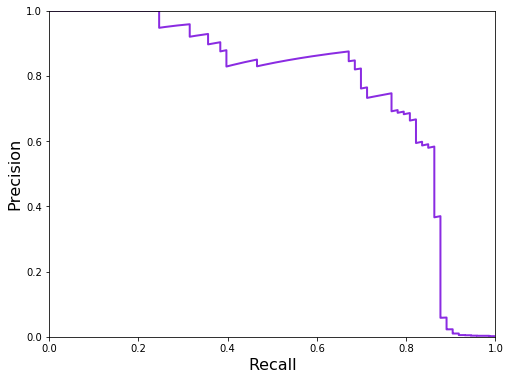

In [64]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
precisions_log, recalls_log, thresholds_log = precision_recall_curve(y_test_1, y_log_scores_pred)
plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions_log, recalls_log)
plt.show()

Precision starts to fall sharply for recall value is about 65% or more, so, we might choose a recall value of about 65%

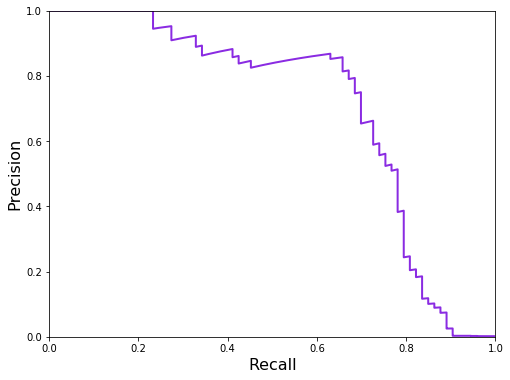

In [65]:
precisions_sgd, recalls_sgd, thresholds_sgd = precision_recall_curve(y_test_1, y_sgd_scores_pred)
plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions_sgd, recalls_sgd)
plt.show()

Precision starts to fall sharply when recall value is about 60%, so, we might choose a recall value of about 60%

* Plotting ROC Curve

In [81]:
from sklearn.metrics import roc_curve

fpr_log, tpr_log, thresholds_log = roc_curve(y_test_1, y_log_scores_pred)
fpr_sgd, tpr_sgd, thresholds_sgd = roc_curve(y_test_1, y_sgd_scores_pred)

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, color='darkorange')
    plt.plot([0, 1], [0, 1], color='navy', linewidth=2, linestyle='--')
    plt.axis([-0.02, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

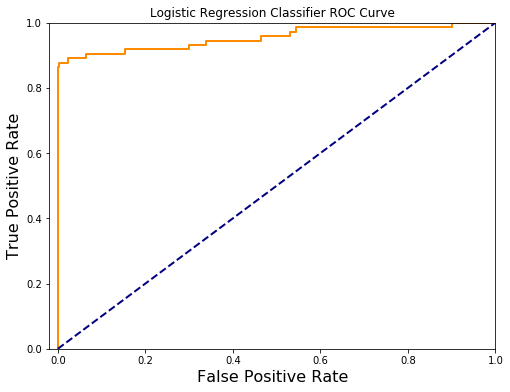

In [82]:
plt.figure(figsize=(8, 6))
plot_roc_curve(fpr_log, tpr_log)
plt.title('Logistic Regression Classifier ROC Curve')
plt.show()

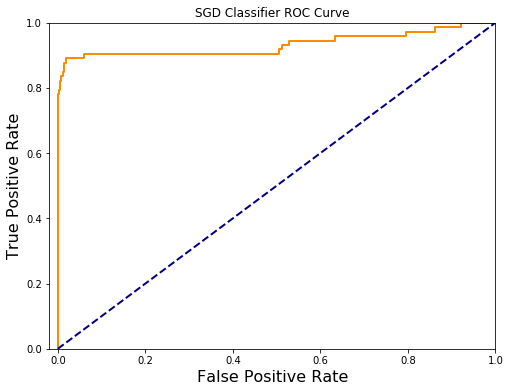

In [83]:
plt.figure(figsize=(8, 6))
plot_roc_curve(fpr_sgd, tpr_sgd)
plt.title('SGD Classifier ROC Curve')
plt.show()

Receiver Operating Characteristic (ROC) curve provides an alternative way of deciding on the threshold

It is a plot of true positive rate (another name for recall) against false positive rate (FPR)

Let's compare the area under the curve (AUC) of their ROC curve to compare different classifiers is to compare the area under the curve (AUC) of their ROC curve.

* ROC-AUC Score

In [69]:
from sklearn.metrics import roc_auc_score

print("The ROC-AUC score of Logistic Regression is {}".format(roc_auc_score(y_test_1, y_log_scores_pred)))
print("The ROC-AUC score of SGD Classifier is {}".format(roc_auc_score(y_test_1, y_sgd_scores_pred)))

The ROC-AUC score of Logistic Regression is 0.9542977492721558
The ROC-AUC score of SGD Classifier is 0.9328250630198657


* Combined ROC Curve

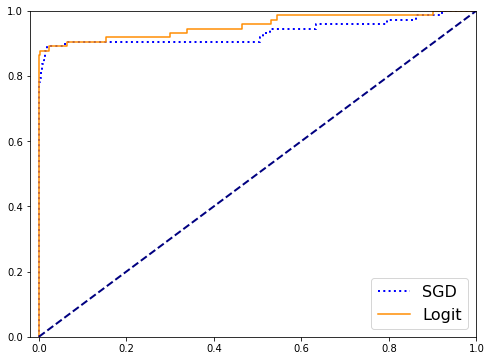

In [89]:
plt.figure(figsize=(8, 6))
plt.plot(fpr_sgd, tpr_sgd, "b:", linewidth=2, label="SGD")
plt.plot(fpr_log, tpr_log, color = "darkorange", label ="Logit")
plt.plot([0, 1], [0, 1], color='navy', linewidth=2, linestyle='--')
plt.axis([-0.02, 1, 0, 1])
plt.legend(loc="lower right", fontsize=16)
plt.show()

*Logistic classifier looks better definitely for ROC curve.*

#### 3.2.2 Supervised Machine Learning - Trees and SVM


#### _Data_

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [6]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

To detect the credit fraud, we are less interested in the skill of the model at predicting class 0 correctly.
It is only concerned with the correct prediction of the minority class, class 1 ("fraud").
Therefore, I used recall value for the following models.


From the results shown above, we then can see the data is highly unbalanced. Thus, we decided to use unblanced method to resample the model.

#### _Preparing the Evaluation Tools_

In [7]:
from sklearn.metrics import recall_score,accuracy_score,make_scorer,confusion_matrix,precision_recall_curve,roc_curve,auc

def plot_roc_curve(label,pre):
    fpr,tpr,thresholds=roc_curve(label,pre)
    roc_auc=auc(fpr,tpr)
    lw = 2

    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="lower right")
    plt.show()
def plot_pr_curve(label,pre):
    precisions, recalls,thresholds=precision_recall_curve(label,pre)
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])
    plt.show()
def print_score(label,pre):
    print('test acc:{}'.format(accuracy_score(label,pre)))
    print('test recall:{}'.format(recall_score(label,pre)))
    print('confusion_matrix')
    print(confusion_matrix(label,pre))

#### _Decision Tree Classifier_

In [10]:
from imblearn.over_sampling import SMOTE

clf_SMOTE=SMOTE(random_state=42)
X_res, y_res = clf_SMOTE.fit_resample(X_train, y_train)

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

par={'max_depth':[10,15,20],'min_samples_split':[20,30,50]}
clf=DecisionTreeClassifier()

In [12]:
recall=make_scorer(score_func=recall_score,greater_is_better=True)

Grid=GridSearchCV(estimator=clf,
    param_grid=par,
    scoring=recall,
    n_jobs=-1,verbose=1,cv=5)

In [13]:
Grid.fit(X_res,y_res)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:  3.2min finished


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [10, 15, 20],
                         'min_samples_split': [20, 30, 50]},
             scoring=make_scorer(recall_score), verbose=1)

In [14]:
print('best_params_:{}'.format(Grid.best_params_))

best_params_:{'max_depth': 20, 'min_samples_split': 20}


Use Decision Tree Classifier with the best parameters found by Grid Search method:

In [15]:
clf_De=DecisionTreeClassifier(max_depth=20,min_samples_split=20)

In [16]:
clf_De.fit(X_res,y_res)

DecisionTreeClassifier(max_depth=20, min_samples_split=20)

In [17]:
pre_De=clf_De.predict(X_test)
pre_De_pro=clf_De.predict_proba(X_test)
print_score(y_test,pre_De)

test acc:0.9951546078041245
test recall:0.7808219178082192
confusion_matrix
[[42457   191]
 [   16    57]]


Through the Decision Tree Classifier:
* There are 42457 "ture negatives" ("not fraud" cases correctly classified as "not fraud")
* There are 57 "ture positives" ("fraud" cases correctly classified as "fraud")
* There are 191 "false positives" ("not fraud" cases incorrectly classified as "fraud"
* There are 16 "false negatives" ("fraud" cases incorrectly classified as "not fraud")

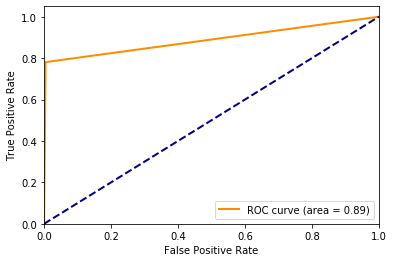

In [18]:
plot_roc_curve(y_test,pre_De)

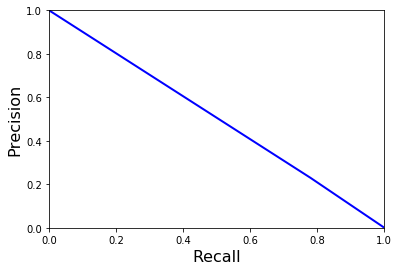

In [19]:
plot_pr_curve(y_test,pre_De)

As we can see from the graph, the trade-off between precision and recall is almost linear. 

#### _Linear SVM_

In [20]:
from sklearn.svm import LinearSVC

clf_svm=LinearSVC()
clf_svm.fit(X_res,y_res)

LinearSVC()

In [21]:
pre_De_svm=clf_svm.predict(X_test)
print_score(y_test,pre_De_svm)

test acc:0.9760773390135998
test recall:0.9041095890410958
confusion_matrix
[[41633  1015]
 [    7    66]]


Through the Linear SVM Classifier:
* There are 41633 "ture negatives" ("not fraud" cases correctly classified as "not fraud")
* There are 66 "ture positives" ("fraud" cases correctly classified as "fraud")
* There are 1015 "false positives" ("not fraud" cases incorrectly classified as "fraud"
* There are 7 "false negatives" ("fraud" cases incorrectly classified as "not fraud")

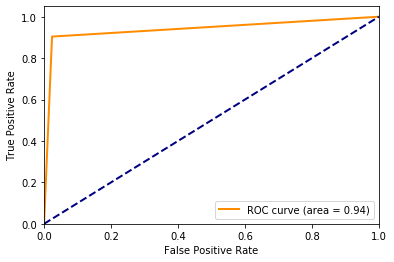

In [24]:
plot_roc_curve(y_test,pre_De_svm)

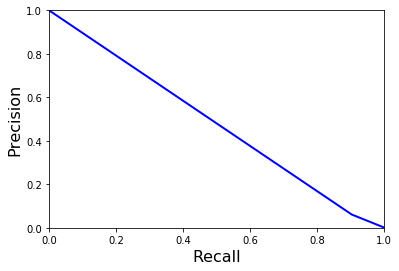

In [25]:
plot_pr_curve(y_test,pre_De_svm)

The graph has two linear lines connected together at around 90% for the recall value due to the limitation of the outputs (either 0 or 1). 

#### _Random Forest Classifier_

In [26]:
from sklearn.ensemble import RandomForestClassifier

clf_random=RandomForestClassifier(n_estimators=100)
clf_random.fit(X_res,y_res)

RandomForestClassifier()

In [27]:
pre_De_random=clf_random.predict(X_test)
print_score(y_test,pre_De_random)

test acc:0.9995084384728822
test recall:0.821917808219178
confusion_matrix
[[42640     8]
 [   13    60]]


Through the Random Forest Classifier:
* There are 42640 "ture negatives" ("not fraud" cases correctly classified as "not fraud")
* There are 60 "ture positives" ("fraud" cases correctly classified as "fraud")
* There are 8 "false positives" ("not fraud" cases incorrectly classified as "fraud")
* There are 13 "false negatives" ("fraud" cases incorrectly classified as "not fraud")

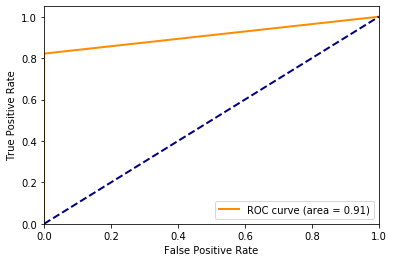

In [28]:
plot_roc_curve(y_test,pre_De_random)

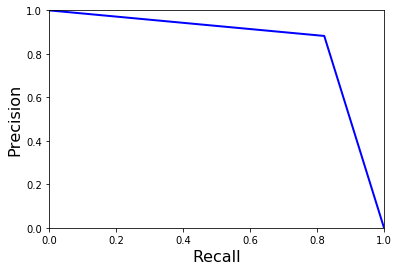

In [29]:
plot_pr_curve(y_test,pre_De_random)

From the graph we can see that precision starts to fall sharply when recall value is about 80%, so, we might choose a recall value of about 80%

#### _Extra Trees Classifier_

In [30]:
from sklearn.ensemble import ExtraTreesClassifier

clf_extra=ExtraTreesClassifier()
clf_extra.fit(X_res,y_res)

ExtraTreesClassifier()

In [31]:
pre_De_extra=clf_extra.predict(X_test)
print_score(y_test,pre_De_extra)

test acc:0.9996488846234873
test recall:0.8493150684931506
confusion_matrix
[[42644     4]
 [   11    62]]


Through the Extra Trees Classifier:
* There are 42644 "ture negatives" ("not fraud" cases correctly classified as "not fraud")
* There are 62 "ture positives" ("fraud" cases correctly classified as "fraud")
* There are 4 "false positives" ("not fraud" cases incorrectly classified as "fraud"）
* There are 11 "false negatives" ("fraud" cases incorrectly classified as "not fraud")

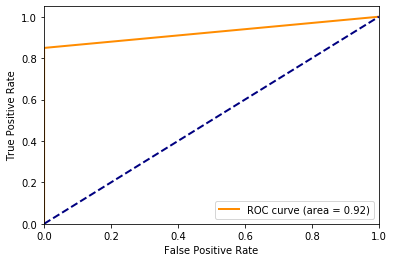

In [32]:
plot_roc_curve(y_test,pre_De_extra)

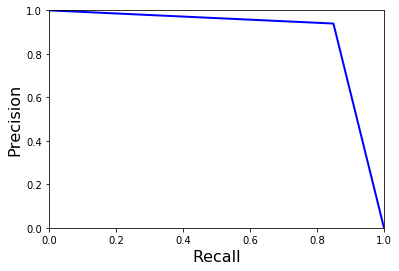

In [33]:
plot_pr_curve(y_test,pre_De_extra)

Similar to the Random Forest Classifier, we might choose a recall value of about 80%.

#### _GBDT_

In [34]:
from sklearn.ensemble import GradientBoostingClassifier

clf_GBDT=GradientBoostingClassifier(n_estimators=100)
clf_GBDT.fit(X_res,y_res)

GradientBoostingClassifier()

In [35]:
pre_De_gbdt=clf_GBDT.predict(X_test)
print_score(y_test,pre_De_gbdt)

test acc:0.9866576156925165
test recall:0.9041095890410958
confusion_matrix
[[42085   563]
 [    7    66]]


Through the GBGT Classifier:
* There are 42085 "ture negatives" ("not fraud" cases correctly classified as "not fraud")
* There are 66 "ture positives" ("fraud" cases correctly classified as "fraud")
* There are 563 "false positives" ("not fraud" cases incorrectly classified as "fraud")
* There are 7 "false negatives" ("fraud" cases incorrectly classified as "not fraud")

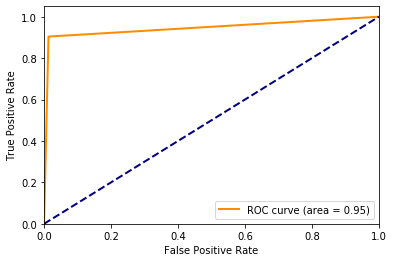

In [36]:
plot_roc_curve(y_test,pre_De_gbdt)

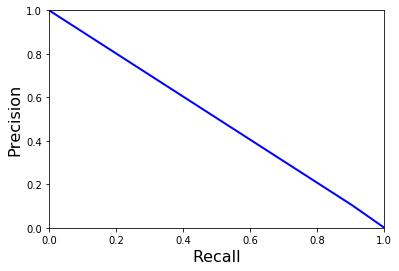

In [37]:
plot_pr_curve(y_test,pre_De_gbdt)

#### _Linear  SVM+ Random Forest Classifier + GBDT_

As the combined model needs each model to have distinct variances from one and another, thus we chose the Linear SVM which is based on the distance, and the Random Forest with GBDT which is based on Decision Tree.

Since Linear SVM cannot produce output with probabilities, the prediction values we are using in the four models are all dummy variables, that is, either 0 or 1. Thus, we can take an average among four predictions. If the average value is greater than 0.5, then we can consider the value as combined model as "1", which is "fraud".

Alternativly, this method is equivalent to "hard-voting".

In [38]:
ave_pre=(pre_De+pre_De_svm+pre_De_random+pre_De_gbdt)/4
ave_pre=(ave_pre>=0.5).astype('int')

In [39]:
print_score(y_test,ave_pre)

test acc:0.991175300203647
test recall:0.9041095890410958
confusion_matrix
[[42278   370]
 [    7    66]]


Through the combined Classifier:
* There are 42278 "ture negatives" ("not fraud" cases correctly classified as "not fraud")
* There are 66 "ture positives" ("fraud" cases correctly classified as "fraud")
* There are 370 "false positives" ("not fraud" cases incorrectly classified as "fraud"）
* There are 7 "false negatives" ("fraud" cases incorrectly classified as "not fraud")

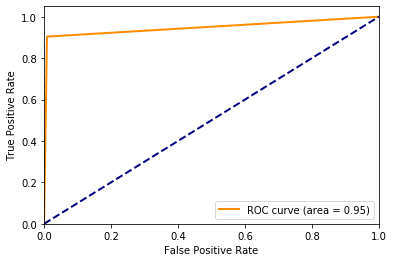

In [40]:
plot_roc_curve(y_test,ave_pre)

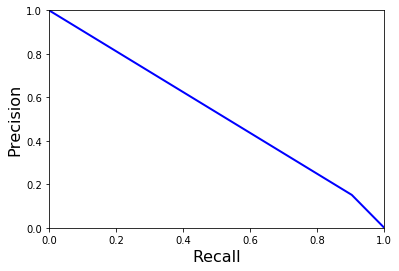

In [41]:
plot_pr_curve(y_test,ave_pre)

#### _Models Comparison_

Although every model has accuracy achieved 99% except the Linear SVM has a lower value (97.61%), We can not conclude that our models fitted the data well only by looking at the accuracy due to the highly imbalance data. Thus, we will do the evaluation based on the recall values.

Recall values on the models:  Combined （90.411%）= GBDT = Linear SVM > Extra Tree > Random Forest > Decision Tree

Since the combined model (Linear SVM + Random Forest Classifier + GBDT) has the highest recall value 85.71% with fewer "false negatives" (i.e "fraud" cases incorrectly classified as "not fraud") and higher accuracy, we believe that the combined model is a better choice among the other models, in order to catpature as many as fraud possible.

#### 3.2.3 Unsupervised Machine Learning 

#### _0 Background_

Given our dataset is very unbalanced, we consider that we can use outlier dection method of unsupervised learning, but the Gaussian Mixture may not be realized due to time restriction. However, it doesn't mean that unsupervised learning is not valuable. In fact, among what we learned in chapter 9(Hands-on-Machine-Learning), dimensionality Reduction technique( using Kmeans method) is worth using, its principle is to measure each instance’s affinity with each cluster , then we run cross validation to analyze them to find the best k.

#### _1 Data Preparation_

We have prepare the dataset at step 2 uniformly even including spliting. But I have to reduct the dimension for whole X, thus, I only use X,y which is just after scaling, and do the spliting work later on.

#### _2 Dimension Reduction_

Using Kmeans to do the dimentionality reduction, we try k from 1 to 10 here. Because there are 30 features in total, roughly speaking, it doesn't make much sense to go beyong 10.

In [2]:
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score

//anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
//anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
//anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [7]:
kmc_per_k = [KMeans(n_clusters=k, random_state=42).fit(X)
             for k in range(1, 11)]
X_new = []

for model in kmc_per_k:
    X_new.append(model.transform(X))

After training 10 models, I continue to use Kmeans ( while k=2 ) to fit new X and then use Cross Validation to find which k could get a best score of Recall Rate which matters to fraud detection most and then apply the model of the best k into a supervised learning.
As for the reason of using k=2 here, it is mainly due to y's characteristic which is binary.

#### _3 Find Optimal k_

I use same y here, since only X has been transformed. But I choose y to be stratified spliting together with X_new, even if I know this stratified spliting with the same random_state without any shuffling will print out same results with repect to y. The main reason is that I hope to prevent any possible problem due to inconsisitency problem when we compare the y_test with y_predict.

In [15]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
import matplotlib.pyplot as plt

In [11]:
credit_target=y

In [12]:
X_train=[]
y_train=[]
X_test = []
y_test =[]
kmc_reduced=[]
kmc_test=[]
cm=[]
pre=[]
rec=[]


for i in range(0,10):
    credit_data= pd.DataFrame(X_new[i])
    strat_split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
    train_idx, test_idx = next(strat_split.split(credit_data, credit_target))
    X_train.append(credit_data.iloc[train_idx])
    y_train.append(credit_target.iloc[train_idx])
    X_test.append(credit_data.iloc[test_idx])
    y_test.append(credit_target.iloc[test_idx])
    kmc_reduced.append(KMeans(n_clusters=2, random_state=42).fit(X_train[i]))  
    kmc_test.append(kmc_reduced[i].predict(X_test[i]))
    cm.append(confusion_matrix(y_test[i],kmc_test[i], labels=[False,True]))
    y_t=y_test[i]
    y_t.to_numpy()
    kmc_t=pd.to_numeric(kmc_test[i])
    pre.append(precision_score(y_test[i], kmc_test[i]))
    rec.append(recall_score(y_test[i], kmc_test[i]))
    print("The confusion_matrix of k = {} is {}".format(i+1,cm[i]))
    print("The precision score of k = {} is {}".format(i+1,pre[i]))
    print("The recall score of k = {} is {} ".format(i+1,rec[i])) 

The confusion_matrix of k = 1 is [[55893   971]
 [   28    70]]
The precision score of k = 1 is 0.06724303554274735
The recall score of k = 1 is 0.7142857142857143 
The confusion_matrix of k = 2 is [[55914   950]
 [   28    70]]
The precision score of k = 2 is 0.06862745098039216
The recall score of k = 2 is 0.7142857142857143 
The confusion_matrix of k = 3 is [[56067   797]
 [   30    68]]
The precision score of k = 3 is 0.07861271676300578
The recall score of k = 3 is 0.6938775510204082 
The confusion_matrix of k = 4 is [[56055   809]
 [   31    67]]
The precision score of k = 4 is 0.07648401826484018
The recall score of k = 4 is 0.6836734693877551 
The confusion_matrix of k = 5 is [[56046   818]
 [   30    68]]
The precision score of k = 5 is 0.07674943566591422
The recall score of k = 5 is 0.6938775510204082 
The confusion_matrix of k = 6 is [[56033   831]
 [   30    68]]
The precision score of k = 6 is 0.07563959955506118
The recall score of k = 6 is 0.6938775510204082 
The confus

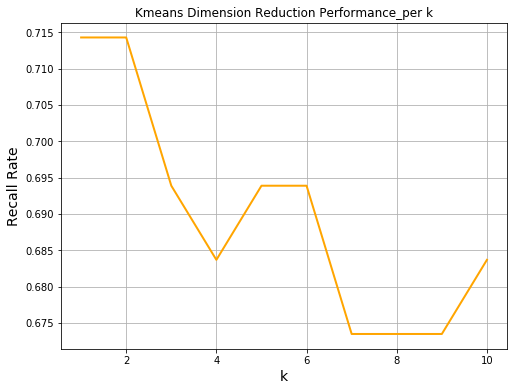

In [16]:
plt.figure(figsize=(8, 6))

plt.title('Kmeans Dimension Reduction Performance_per k')
plt.xlabel("k", fontsize=14) 
plt.ylabel("Recall Rate", fontsize=14) 
plt.grid(True)
plt.plot(np.arange(1,11,1),rec,color='orange', linewidth=2)
plt.show() 

As we could see from the plot and recall rate value that, when k=1 & 2 would result in a good performance ( more than 70%), since when k=2, the precision score is slightly higher than the situation of k=1. We finally decide to use k=2 to operate other supervised learning models. 
Since when k=2, Kmeans has already produced a good performance here, we decide not to consider any supervised learning which has a score lower than 70%, such as logistic regression and SGD operated above.
But during a tuning process, we have to try it one by one, to see the results and try to find a best one.

By the way, we could observe that there is a slight tendency for "the recall rate  vs k" to increase when k is more than 8, but as we have discussed above, it is not meaningful to choose a after dimentionality to be more than 10.

#### _4 Training_

Here the work is the same with what my teammate Shuyu Yan has done in part 3.2.2, because the most work is similar.

In [26]:
from sklearn.metrics import recall_score,accuracy_score,make_scorer,confusion_matrix,precision_recall_curve,roc_curve,auc

def plot_roc_curve(label,pre):
    fpr,tpr,thresholds=roc_curve(label,pre)
    roc_auc=auc(fpr,tpr)
    lw = 2

    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="lower right")
    plt.show()
def plot_pr_curve(label,pre):
    precisions, recalls,thresholds=precision_recall_curve(label,pre)
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])
    plt.show()
def print_score(label,pre):
    print('test acc:{}'.format(accuracy_score(label,pre)))
    print('test recall:{}'.format(recall_score(label,pre)))
    print('confusion_matrix')
    print(confusion_matrix(label,pre))

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

//anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [19]:
from imblearn.over_sampling import SMOTE

In [20]:
clf_SMOTE=SMOTE(random_state=42)
X_res, y_res = clf_SMOTE.fit_resample(X_train[1], y_train[1])

#### _4.1 random forest_

First, I choose to use random forest here, because it behaves best among all the practices done above, with recall rate more then 90%.

In [21]:
from sklearn.ensemble import RandomForestClassifier

clf_random=RandomForestClassifier(n_estimators=100)
clf_random.fit(X_res,y_res)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [23]:
pre_De_random_u=clf_random.predict(X_test[1])
print_score(y_test[1],pre_De_random_u)

test acc:0.9627119834275482
test recall:0.5918367346938775
confusion_matrix
[[54780  2084]
 [   40    58]]


Unfortunately, it does not work well here, we could try other models in the descending sequence of recall rate Shuyu get in her work.

#### _4.2 GBDT_

In [22]:
from sklearn.ensemble import GradientBoostingClassifier

clf_GBDT=GradientBoostingClassifier(n_estimators=100)
clf_GBDT.fit(X_res,y_res)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [24]:
pre_De_gbdt_u=clf_GBDT.predict(X_test[1])
print_score(y_test[1],pre_De_gbdt_u)

test acc:0.9524946455531758
test recall:0.8571428571428571
confusion_matrix
[[54172  2692]
 [   14    84]]


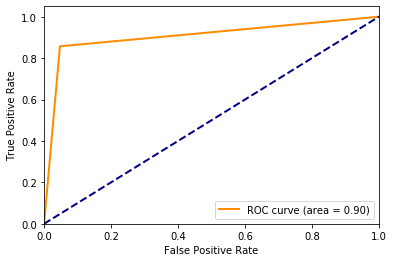

In [27]:
plot_roc_curve(y_test[1],pre_De_gbdt_u)

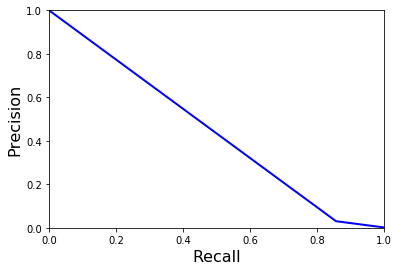

In [28]:
plot_pr_curve(y_test[1],pre_De_gbdt_u)

Surprisingly, this model performs very well, even much better than the clustering itself. According to what we have tried till now, 86% recall rate with 95% precision rate is such a good model that it could meet our requirement. But we do not satisfy with it, we could try something else.

#### _4.3 linear SVM_

In [29]:
from sklearn.svm import LinearSVC

clf_svm=LinearSVC()
clf_svm.fit(X_res,y_res)

//anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [30]:
pre_De_svm_u=clf_svm.predict(X_test[1])
print_score(y_test[1],pre_De_svm_u)

test acc:0.961342649485622
test recall:0.8673469387755102
confusion_matrix
[[54675  2189]
 [   13    85]]


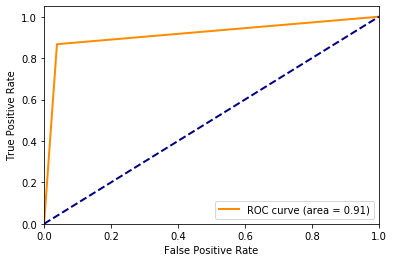

In [31]:
plot_roc_curve(y_test[1],pre_De_svm_u)

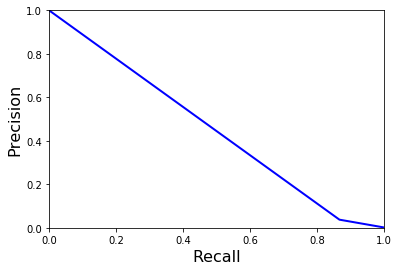

In [32]:
plot_pr_curve(y_test[1],pre_De_svm_u)

Good news, till now, linear SVM performs very great, with both higher recall rate and higher precision rate.
Since decision tree has achieved a score as 78%, we could still give a chance to it.

#### _4.4 Decision Tree_

In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

par={'max_depth':[10,15,20],'min_samples_split':[20,30,50]}
clf=DecisionTreeClassifier()

In [34]:
recall=make_scorer(score_func=recall_score,greater_is_better=True)

Grid=GridSearchCV(estimator=clf,
    param_grid=par,
    scoring=recall,
    n_jobs=-1,verbose=1,cv=5)

In [35]:
Grid.fit(X_res,y_res)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:   15.8s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': [10, 15, 20],
                         'mi

In [36]:
print('best_params_:{}'.format(Grid.best_params_))

best_params_:{'max_depth': 20, 'min_samples_split': 20}


In [37]:
clf_De=DecisionTreeClassifier(max_depth=20,min_samples_split=20)

In [38]:
clf_De.fit(X_res,y_res)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=20, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [39]:
pre_De_u=clf_De.predict(X_test[1])
pre_De_pro_u=clf_De.predict_proba(X_test[1])
print_score(y_test[1],pre_De_u)

test acc:0.9529510902004845
test recall:0.6836734693877551
confusion_matrix
[[54215  2649]
 [   31    67]]


Unfortunately, it disappoints us here.

#### _5 conclusion_

Our basic logic here, is to using Kmeans.transform to get a X_new with reducted dimentionality firsty, (while choosing a best k with highest recall rate). At this step, we find k=2 is the optimal one. 
Then, we tried some supervised learning models which behave well (with recall rate > 70%) during our supervised learning process above. After several attempts, we find that, Linear SVM behaves best(with 86.73% recall rate and 96.23% precision rate).
To sum up, a model combining an Kmeans method(at k=2)(unsupervised learning method)and a Linear SVM (supervised learning method) behaves best in this algorithm.

#### 3.2.4 Deep Neural Network

#### _Training_

We decided to train our DNN model through TensorFlow's Keras based on multi-layer perceptron. 
* We used 8 hidden layers and each hidden layer has 300, 200, 200, 100, 100, 50, 50, and 50 neurons separately. 
* Each neuron is activated through Selu function and in order to tackle neuron nonsaturating activation problem, we chose LeCun normal as the corresponding initiation function. All the X variables have been standardized to fit into the LeCun normal initialization beforehand. 
* Furthermore, we used sigmoid activation function in the last output layer since this is a binary classifiction problem, we believe logistic regression can offer us an ideal result. 
* We applied Nesterov momentum and exponential learning schedule to design our own optimizer. The application of both functions can expediate our model converging speed. 
* We initially planned to adopt early stopping. However, as we trained our model, we realized that the validation recall rate would enter in a constant stage without further improving but the training loss may still decrease. In order to gain a broader overview of how the learning curves change, we decided to set our training epochs 50.

In [10]:
import tensorflow as tf
from tensorflow import keras

def reset_session(seed=42):
    tf.random.set_seed(seed)
    np.random.seed(seed)
    tf.keras.backend.clear_session()

In [11]:
##Reset seed
reset_session()

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[X.shape[1]]))

##Adding hidden layer
for n_hidden in (300, 200, 200, 100, 100, 50, 50, 50):
    model.add(keras.layers.Dense(n_hidden, 
                                 activation="selu",
                                 kernel_initializer="lecun_normal"))

##Adding output layer
model.add(keras.layers.Dense(1, 
                             activation="sigmoid"))

##Defining optimizer
optimizer = keras.optimizers.SGD(lr=0.001, 
                                 momentum=0.9, 
                                 nesterov=True,
                                 decay = 1e-4
                                )

##Evaluating matrics
model.compile(loss="binary_crossentropy",
              optimizer = optimizer,
              metrics=[tf.keras.metrics.Recall()])

##Early stopping function(didn't apply)
early_stopping_cb = keras.callbacks.EarlyStopping(monitor='val_recall',
                                                  mode = 'max',
                                                  verbose = 1,
                                                  patience=30,
                                                  min_delta=0.01,
                                                  restore_best_weights=True)

In [12]:
epochs = 50

run = model.fit(X_train, y_train, epochs = epochs,
                validation_data=(X_val, y_val),
                #callbacks=[early_stopping_cb]
               )

Epoch 1/50
7121/7121 [==============================] - 25s 4ms/step - loss: 0.0055 - recall: 0.7614 - val_loss: 0.0027 - val_recall: 0.8000
Epoch 2/50
7121/7121 [==============================] - 30s 4ms/step - loss: 0.0028 - recall: 0.7843 - val_loss: 0.0025 - val_recall: 0.8000
Epoch 3/50
7121/7121 [==============================] - 26s 4ms/step - loss: 0.0024 - recall: 0.7893 - val_loss: 0.0021 - val_recall: 0.8667
Epoch 4/50
7121/7121 [==============================] - 21s 3ms/step - loss: 0.0022 - recall: 0.7995 - val_loss: 0.0022 - val_recall: 0.8000
Epoch 5/50
7121/7121 [==============================] - 25s 4ms/step - loss: 0.0021 - recall: 0.8071 - val_loss: 0.0022 - val_recall: 0.8000
Epoch 6/50
7121/7121 [==============================] - 22s 3ms/step - loss: 0.0020 - recall: 0.7995 - val_loss: 0.0022 - val_recall: 0.8000
Epoch 7/50
7121/7121 [==============================] - 26s 4ms/step - loss: 0.0019 - recall: 0.8020 - val_loss: 0.0021 - val_recall: 0.8667
Epoch 8/50
71

#### _Evaluation_

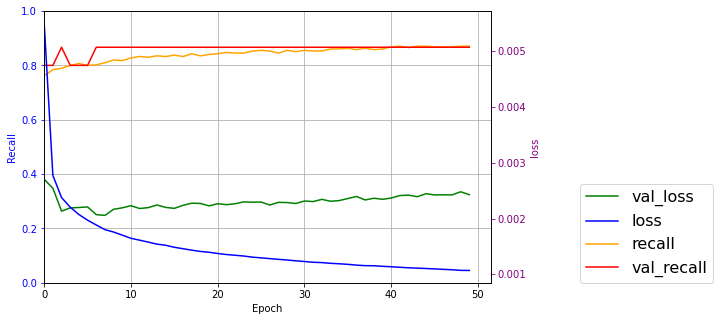

In [14]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
ln3=plt.plot(run.epoch, run.history["recall"], "-", color='orange', label='recall')
ln4=plt.plot(run.epoch, run.history["val_recall"], "r-", label='val_recall')
plt.xlabel("Epoch")
plt.ylabel("Recall", color='b')
plt.tick_params('y', colors='b')
plt.gca().set_xlim(0, None)
plt.gca().set_ylim(0, 1)
plt.grid(True)

ax2 = plt.gca().twinx()
ln1=plt.plot(run.epoch, run.history["val_loss"], "g-", label='val_loss')
ln2=plt.plot(run.epoch, run.history["loss"], "b-", label='loss')
#ln5 = ax2.plot(run.epoch, run.history["lr"], "^-", color='purple', label='lr')
ax2.set_ylabel("loss", color='purple')
ax2.tick_params('y', colors='purple')

lns = ln1+ln2+ln3+ln4
labs = [l.get_label() for l in lns]
plt.legend(lns, labs, loc=(1.2,0), fontsize=16)
plt.show()

After we plotted the recall and loss of the training process, we can see that the highest recall rate the model could achieve is around 86.7%, which means that optimally the model is able to detect around 86.7% of fraudulent transactions in the validation set. Two patterns are worth to mention regarding the figure. 
* First is that the training recall rate and validation recall rate swiftly reach to a plateau around epoch 10. The training recall rate could make small progress in the following epochs; however, the validation recall rate basically stays the same. 
* Secondly, based on the gap between training loss and validation loss, we can say that the training model is overfitting. Even though the training loss and training recall rate continue making progress when fitting into the dataset, the training model doesn't have any significant effect on the recall rate of the validation set but the validation loss indeed starts to increase. It might be due to the unbalanced structure of our dataset, which caused our model reaching to a bottle-neck. 

We futher evaluated the performance of our model on the test set and the recall rate we got is 75.51%, which means among all the 73 fraudulent transactions, we can accurately detect around 55 frauds with the model we trained. 

In [15]:
model.evaluate(X_train, y_train)
model.evaluate(X_val, y_val)
model.evaluate(X_test, y_test)

891/891 [==============================] - 2s 2ms/step - loss: 0.0030 - recall: 0.7551


[0.0029939087107777596, 0.7551020383834839]

#### _Enhancement with Batch Normalization and Dropout_

We further added batch normalization on the top of our model and it generated similar graph as our previous model did. To cure the overfitting problem, we regularized our model by randomly dropping 20% of neurons in each layer and obtained the learning curves in the following. 

In [27]:
##Reset seed
reset_session()

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[X.shape[1]]))
keras.layers.BatchNormalization()
model.add(keras.layers.Dropout(rate=0.2))

##Adding hidden layer
for n_hidden in (300, 200, 200, 100, 100, 50, 50, 50):
    model.add(keras.layers.Dense(n_hidden, 
                                 activation="selu",
                                 kernel_initializer="lecun_normal"))
    keras.layers.BatchNormalization()
    model.add(keras.layers.Dropout(rate=0.2))

##Adding output layer
model.add(keras.layers.Dense(1, 
                             activation="sigmoid"))

##Defining optimizer
optimizer = keras.optimizers.SGD(lr=0.001, 
                                 momentum=0.9, 
                                 nesterov=True,
                                 decay = 1e-4
                                )

##Evaluating matrics
model.compile(loss="binary_crossentropy",
              optimizer = optimizer,
              metrics=[tf.keras.metrics.Recall()])

epochs = 50

run = model.fit(X_train, y_train, epochs = epochs,
                validation_data=(X_val, y_val),
                #callbacks=[early_stopping_cb]
               )

Epoch 1/50
7121/7121 [==============================] - 37s 5ms/step - loss: 0.0180 - recall: 0.4340 - val_loss: 0.0065 - val_recall: 0.7333
Epoch 2/50
7121/7121 [==============================] - 32s 5ms/step - loss: 0.0069 - recall: 0.6091 - val_loss: 0.0057 - val_recall: 0.7333
Epoch 3/50
7121/7121 [==============================] - 29s 4ms/step - loss: 0.0063 - recall: 0.5964 - val_loss: 0.0049 - val_recall: 0.7333
Epoch 4/50
7121/7121 [==============================] - 30s 4ms/step - loss: 0.0055 - recall: 0.6548 - val_loss: 0.0048 - val_recall: 0.7333
Epoch 5/50
7121/7121 [==============================] - 30s 4ms/step - loss: 0.0057 - recall: 0.6396 - val_loss: 0.0044 - val_recall: 0.8000
Epoch 6/50
7121/7121 [==============================] - 30s 4ms/step - loss: 0.0054 - recall: 0.6142 - val_loss: 0.0044 - val_recall: 0.8000
Epoch 7/50
7121/7121 [==============================] - 30s 4ms/step - loss: 0.0055 - recall: 0.6548 - val_loss: 0.0042 - val_recall: 0.8000
Epoch 8/50
71

#### _Evaluation_

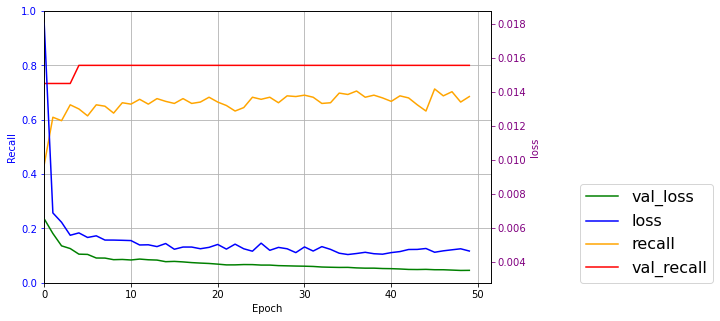

In [28]:
plt.figure(figsize=(8,5))
ln3=plt.plot(run.epoch, run.history["recall"], "-", color='orange', label='recall')
ln4=plt.plot(run.epoch, run.history["val_recall"], "r-", label='val_recall')
plt.xlabel("Epoch")
plt.ylabel("Recall", color='b')
plt.tick_params('y', colors='b')
plt.gca().set_xlim(0, None)
plt.gca().set_ylim(0, 1)
plt.grid(True)

ax2 = plt.gca().twinx()
ln1=plt.plot(run.epoch, run.history["val_loss"], "g-", label='val_loss')
ln2=plt.plot(run.epoch, run.history["loss"], "b-", label='loss')
ax2.set_ylabel("loss", color='purple')
ax2.tick_params('y', colors='purple')

lns = ln1+ln2+ln3+ln4
labs = [l.get_label() for l in lns]
plt.legend(lns, labs, loc=(1.2,0), fontsize=16)
plt.show()

As we can see, the gap between the training loss and validation loss is reduced and the overfitting effect is mitigated; however, as we regularized our model, the validation recall rate also dropped from 86.67% to 80% but the test recall rate boosted from 75% to 81.6%.

In [29]:
model.evaluate(X_train, y_train)
model.evaluate(X_val, y_val)
model.evaluate(X_test, y_test)

891/891 [==============================] - 3s 3ms/step - loss: 0.0043 - recall: 0.8163


[0.004262819420546293, 0.8163265585899353]

## 4. Result Discussion

At the beginning, towards Logistic Classification and Stochastic Gradient Descent(3.2.1), we choose Logistic Classifier as a better model comparing to SGD Classifier, since both of the recall score and ROC-AUC score of Logistic Regression Classifier are higher than SGD.

Also, since the orginal Logistic model and the one after grid search do not differ much from each other, we could choose either of them to make the comparison with other recall scores my group members have. 

In [90]:
print("The recall score of Logistic Classifier is", recall_score(y_test, log_pred))
print("The ROC-AUC score of Logistic Regression is {}".format(roc_auc_score(y_test_1, y_log_scores_pred)))

The recall score of Logistic Classifier is 0.6712328767123288
The ROC-AUC score of Logistic Regression is 0.9542977492721558


Under Section 3.2.3, the main logic is to using Kmeans_transform to get a X_new with reducted dimentionality before some supervised learning method. While choosing a best k with highest recall rate, we find k=2 is the optimal one among k from 1 to 10. 
Then, we tried some supervised learning models which behave well (with recall rate > 70%) during our supervised learning process above. After several attempts, we find that, Linear SVM behaves best(with 86.73% recall rate and 96.23% precision rate).
To sum up, a model combining an Kmeans method(at k=2)(unsupervised learning method)and a Linear SVM (supervised learning method) behaves best in this algorithm.

Under Section 3.2.4,our initial eight-layer multi-perceptron offers us an average 86.7% recall rate on the training dataset and 75.51% on the testing dataset. The performance of testing recall rate was further boosted around 81% after dropout regularization was added into the training model. Generally speaking, the performance of this multi-percetron is optimal; however, the recall rate is still lower than the ones of the tree classification and unsupervised machine learnig created in the previous sections. Thus, we deduce that this deep neural network model is not as efficient as other supervised and unsupervised machine learning models when doing anomaly detection, in terms of computing time, complexity, and recall rate.


Overall, under Section 3.2.2 Supervised Machine Learning, the Combined Model (Linear SVM + Random Forest Classifier + GBDT), Gradient Boosting Classifier and the Linear Support Vector Machines has reached 90.411% on the recall values. In order to detect as many as false negatives ("fraud" cases incorrectly classified as "not fraud"), we choose the Combined model for its fewer false negatives cases. Comparing with the all the recall values we have gotten, we conclude that the Combined Model is indeed the best one among all the algorithms in this project for its highest recall value, and the reason for such a high recall socre may be the resampling method (i.e "SMOTE").

## 5. Improvement

Data itself is one big concern when we were doing machine learning training. Since the sample timeframe only covers two days, the number of transactions collected is limited and the frauds might not be representative (fraudulent activities can be seasonal and depend on other regulations and policies.) Diversifying our dataset can be one good venue to enhance our training models. Furthermore, using multiple dataset can enable us to use transfering learning to train on different dataset, and expanding timeframe can allow us to employ recurrent neural network to conduct time series analysis. We may detect recursive patterns of the fraudulent activities by adding more data; however, searching similar data can be a hard process, especially all the variables should be uniform.

Moreover, our research can further be expanded to detect the correlation between the amount of money and whether the transaction is fraudulent or not, since the project focuses on building models to limit the financial impact brought by fraudulent transactions. This proposal we believe is worth to try for further improvement. 